In [1]:
import pooch
POOCH = pooch.create(
    path=pooch.os_cache("noaa-data"),
    # Use the figshare DOI
    base_url="doi:10.5281/zenodo.5553029/",
    registry={
        "HEADERS.txt": "md5:2a306ca225fe3ccb72a98953ded2f536",
        "CRND0103-2016-NY_Millbrook_3_W.txt": "md5:eb69811d14d0573ffa69f70dd9c768d9",
        "CRND0103-2017-NY_Millbrook_3_W.txt": "md5:b911da727ba1bdf26a34a775f25d1088",
        "CRND0103-2018-NY_Millbrook_3_W.txt": "md5:5b61bc687261596eba83801d7080dc56",
        "CRND0103-2019-NY_Millbrook_3_W.txt": "md5:9b814430612cd8a770b72020ca4f2b7d",
        "CRND0103-2020-NY_Millbrook_3_W.txt": "md5:cd8de6d5445024ce35fcaafa9b0e7b64"
    },
)


import pandas as pd

with open(POOCH.fetch("HEADERS.txt")) as fp:
    data = fp.read()
lines = data.split('\n')
headers = lines[1].split(' ')

dframes = []
for year in range(2016, 2019):
    fname = f'CRND0103-{year}-NY_Millbrook_3_W.txt'               
    df = pd.read_csv(POOCH.fetch(fname), parse_dates=[1],
                     names=headers, header=None, sep='\s+',
                     na_values=[-9999.0, -99.0])
    dframes.append(df)

df = pd.concat(dframes)
df = df.set_index('LST_DATE')
df

#########################################################
#### BELOW ARE THE VARIABLES YOU SHOULD USE IN THE PLOTS!
#### (numpy arrays)  
#### NO PANDAS ALLOWED!
#########################################################

t_daily_min = df.T_DAILY_MIN.values
t_daily_max = df.T_DAILY_MAX.values
t_daily_mean = df.T_DAILY_MEAN.values
p_daily_calc = df.P_DAILY_CALC.values
soil_moisture_5 = df.SOIL_MOISTURE_5_DAILY.values
soil_moisture_10 = df.SOIL_MOISTURE_10_DAILY.values
soil_moisture_20 = df.SOIL_MOISTURE_20_DAILY.values
soil_moisture_50 = df.SOIL_MOISTURE_50_DAILY.values
soil_moisture_100 = df.SOIL_MOISTURE_100_DAILY.values
date = df.index.values

In [2]:
units = lines[2].split(' ')
for name, unit in zip(headers, units):
    print(f'{name}: {unit}')

WBANNO: XXXXX
LST_DATE: YYYYMMDD
CRX_VN: XXXXXX
LONGITUDE: Decimal_degrees
LATITUDE: Decimal_degrees
T_DAILY_MAX: Celsius
T_DAILY_MIN: Celsius
T_DAILY_MEAN: Celsius
T_DAILY_AVG: Celsius
P_DAILY_CALC: mm
SOLARAD_DAILY: MJ/m^2
SUR_TEMP_DAILY_TYPE: X
SUR_TEMP_DAILY_MAX: Celsius
SUR_TEMP_DAILY_MIN: Celsius
SUR_TEMP_DAILY_AVG: Celsius
RH_DAILY_MAX: %
RH_DAILY_MIN: %
RH_DAILY_AVG: %
SOIL_MOISTURE_5_DAILY: m^3/m^3
SOIL_MOISTURE_10_DAILY: m^3/m^3
SOIL_MOISTURE_20_DAILY: m^3/m^3
SOIL_MOISTURE_50_DAILY: m^3/m^3
SOIL_MOISTURE_100_DAILY: m^3/m^3
SOIL_TEMP_5_DAILY: Celsius
SOIL_TEMP_10_DAILY: Celsius
SOIL_TEMP_20_DAILY: Celsius
SOIL_TEMP_50_DAILY: Celsius
SOIL_TEMP_100_DAILY: Celsius
: 


In [3]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

Text(0.5, 0, 'Date')

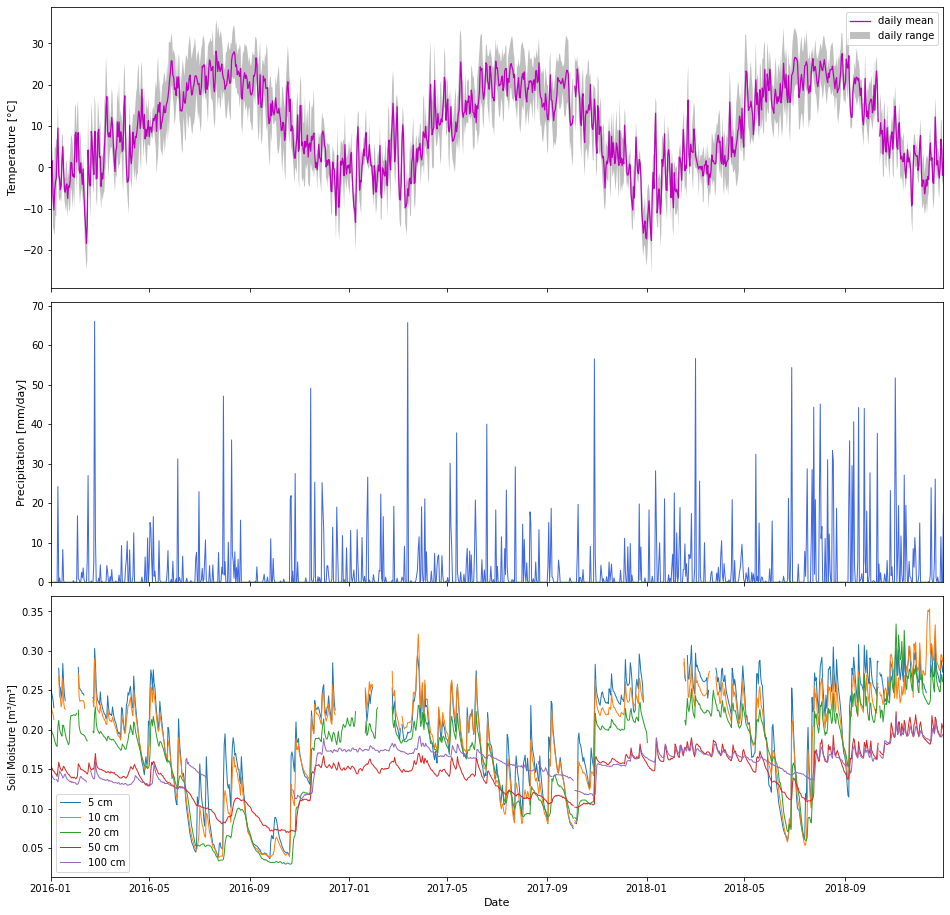

In [4]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(16, 16))
plt.subplots_adjust( hspace=.05)

ax1.plot(date, t_daily_mean, lw=1.25, label='daily mean', color='m')
ax1.fill_between(date, t_daily_min, t_daily_max, facecolor='gray', alpha=0.5,
                label='daily range')
ax1.set_ylabel('Temperature [°C]', fontsize = 11)
ax1.legend(loc='upper right')
ax1.margins(x=0)

ax2.plot(date, p_daily_calc, lw=1, color='royalblue')
ax2.set_ylabel('Precipitation [mm/day]', fontsize = 11)
ax2.margins(x=0, y=0)
ax2.set_ylim(np.nanmin(p_daily_calc), np.nanmax(p_daily_calc)+5)

ax3.plot(date, soil_moisture_5, lw=1, color='tab:blue', label='5 cm')
ax3.plot(date, soil_moisture_10, lw=1, color='tab:orange', label='10 cm')
ax3.plot(date, soil_moisture_20, lw=1, color='tab:green', label='20 cm')
ax3.plot(date, soil_moisture_50, lw=1, color='tab:red', label='50 cm')
ax3.plot(date, soil_moisture_100, lw=1, color='tab:purple', label='100 cm')
ax3.legend(loc='lower left')
ax3.set_ylabel('Soil Moisture [m³/m³]')
ax3.margins(x=0)
ax3.set_xlabel("Date", fontsize = 11)


In [5]:
import xarray as xr
ds_url = 'http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCEP-NCAR/.CDAS-1/.MONTHLY/.Diagnostic/.surface/.temp/dods'
ds = xr.open_dataset(ds_url, decode_times=False)

#########################################################
#### BELOW ARE THE VARIABLES YOU SHOULD USE IN THE PLOTS!
#### (numpy arrays) 
#### NO XARRAY ALLOWED!
#########################################################

temp = ds.temp[-1].values - 273.15
lon = ds.X.values
lat = ds.Y.values

In [6]:
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator

In [7]:
, vmin=-30, vmax=np.nanmax(temp), 

('vmin=-30,', 'vmax=np.nanmax(temp),')

Text(0.5, 1.0, 'Zonal Mean Temperature')

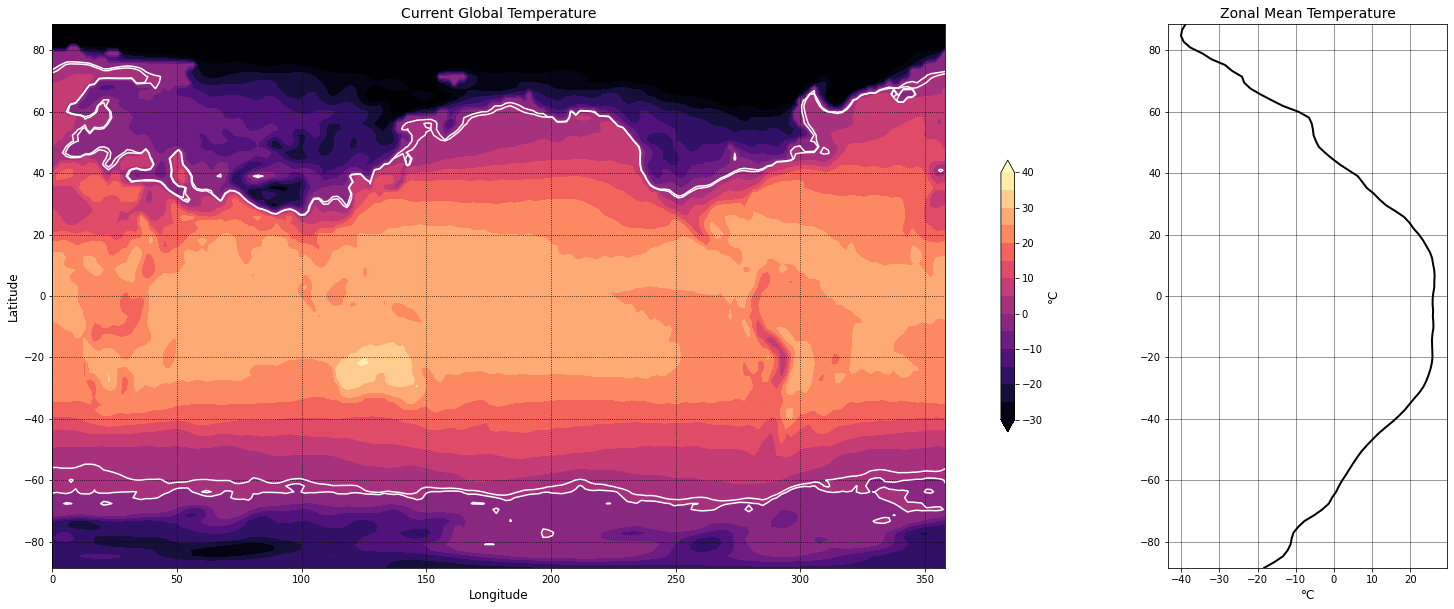

In [8]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 10), gridspec_kw={'width_ratios': [4, 1]})
plt.subplots_adjust( wspace=0)

levels = MaxNLocator(nbins=15).tick_values(-30, 40)
heat = ax1.contourf(lon, lat, temp, levels=levels, cmap="magma", extend="both")
levels = [0, 1]
line = ax1.contour(lon, lat,temp,levels=levels,
                 colors='w',linewidths=1.5)
cb = fig.colorbar(heat, ax=ax1, shrink=.5, label='°C')
cb.set_label(label='°C', fontsize= 12)
cb.ax.tick_params(labelsize=10)
ax1.grid(True, color='black', ls=':')
ax1.set_xlabel('Longitude', fontsize = 12)
ax1.set_ylabel('Latitude', fontsize = 12)
ax1.set_title('Current Global Temperature', fontsize = 14)

temp_mean = temp.mean(axis=1)
ax2.plot(temp_mean, lat, color='k', linewidth=2)
ax2.margins(y=0)
ax2.grid(True, color='black', alpha=.5)
ax2.set_xlabel('°C', fontsize = 12)
ax2.set_title('Zonal Mean Temperature', fontsize = 14)


In [9]:
fname = pooch.retrieve(
    "https://rabernat.github.io/research_computing/signif.txt.tsv.zip",
    known_hash='22b9f7045bf90fb99e14b95b24c81da3c52a0b4c79acf95d72fbe3a257001dbb',
    processor=pooch.Unzip()
)[0]

earthquakes = np.genfromtxt(fname, delimiter='\t')
depth = earthquakes[:, 8]
magnitude = earthquakes[:, 9]
latitude = earthquakes[:, 20]
longitude = earthquakes[:, 21]

Unzipping contents of '/Users/jordidaley/Library/Caches/pooch/031a30a92d6a3a2680d86514a24e9321-signif.txt.tsv.zip' to '/Users/jordidaley/Library/Caches/pooch/031a30a92d6a3a2680d86514a24e9321-signif.txt.tsv.zip.unzip'


In [17]:
earthquakes

array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [ 1.0000e+00,         nan, -2.1500e+03, ...,         nan,
                nan,         nan],
       [ 3.0000e+00,         nan, -2.0000e+03, ...,  1.0000e+00,
                nan,         nan],
       ...,
       [ 1.0262e+04,         nan,  2.0170e+03, ...,         nan,
                nan,  4.0000e+00],
       [ 1.0263e+04,         nan,  2.0170e+03, ...,  1.0000e+00,
                nan,         nan],
       [ 1.0264e+04,         nan,  2.0170e+03, ...,         nan,
         5.6000e+01,  2.0000e+00]])

/var/folders/v0/mczfyjnd3bb7356_x3gmplhw0000gn/T/ipykernel_22012/2399498447.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(longitude, latitude, s=((magnitude**4)/100), c=np.log10(depth))


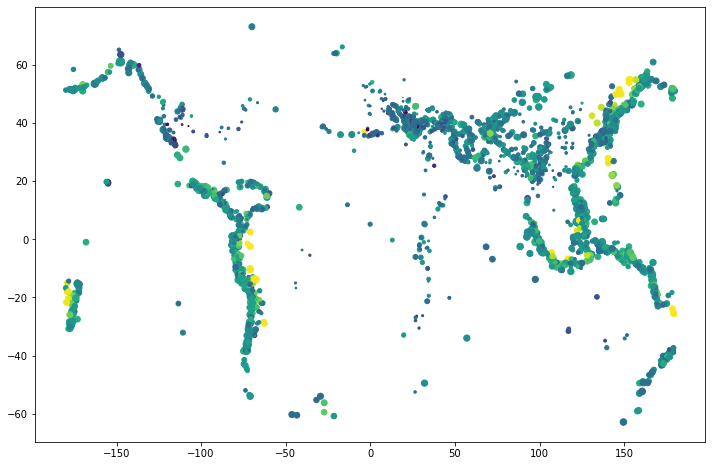

In [25]:
plt.figure(figsize=(12, 8))
plt.scatter(longitude, latitude, s=((magnitude**4)/100), c=np.log10(depth))
plt.show()